# Grosser Aletschgletscher Indicators Forecasting

In [92]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly

from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [93]:
data_GA = pd.read_csv('data/data_GA.csv')

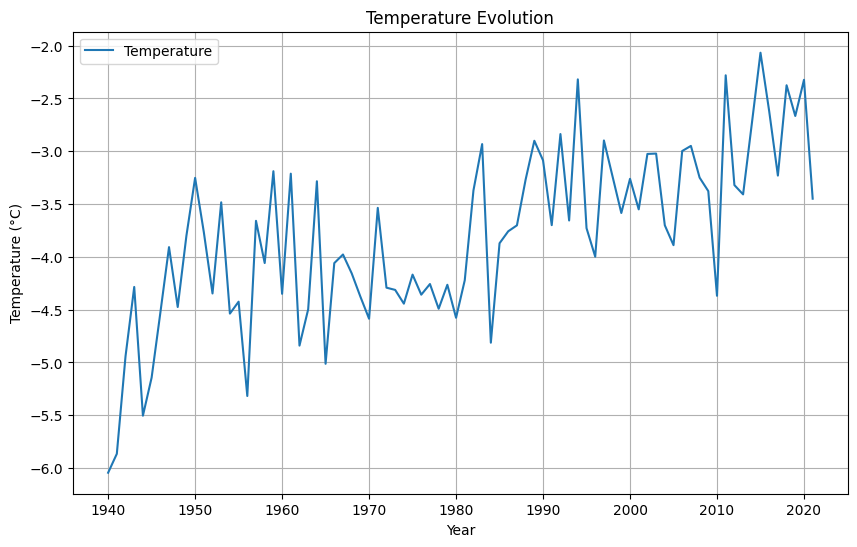

In [94]:
# Analyse the evolution of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data_GA['start date of observation'], data_GA['temperature_2m_mean (°C)'], label='Temperature')
plt.title('Temperature Evolution')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Creating Scenarios

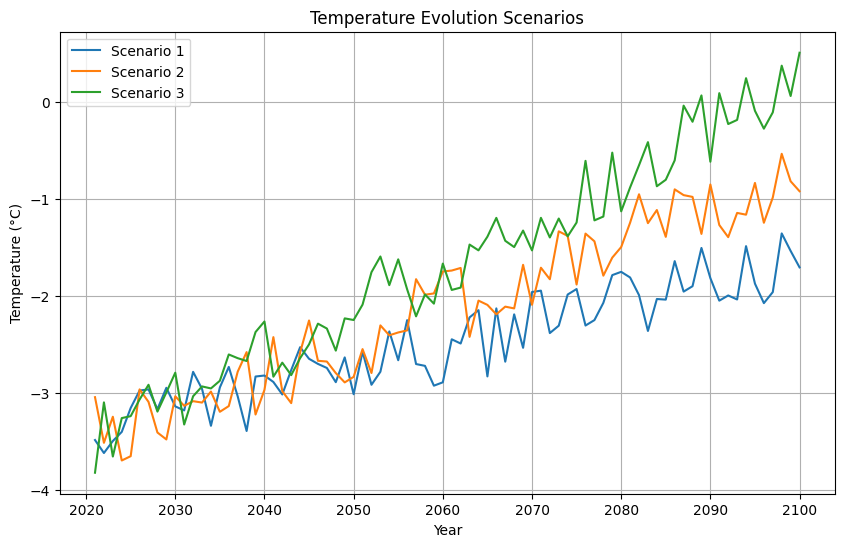

In [95]:
# Each scenario represents a different increase in temperature in 2100
scenario_1 = 1.8
scenario_2 = 2.7
scenario_3 = 3.6

# 2021 is the last year in the dataset 
CURRENT_YEAR = 2021
MAX_YEAR = 2100
last_value = data_GA['temperature_2m_mean (°C)'].iloc[-1]
standard_deviation = data_GA['temperature_2m_mean (°C)'].std()

def get_temperature_at_year_given_scenario(year, scenario):
    percentage = (year - CURRENT_YEAR) / (MAX_YEAR - CURRENT_YEAR)
    return last_value + scenario * percentage + .5 * random.uniform(-standard_deviation, standard_deviation)

scenario_1_temperature = [
    get_temperature_at_year_given_scenario(year, scenario_1)
    for year in range(CURRENT_YEAR, MAX_YEAR + 1)
]

scenario_2_temperature = [
    get_temperature_at_year_given_scenario(year, scenario_2)
    for year in range(CURRENT_YEAR, MAX_YEAR + 1)
]

scenario_3_temperature = [
    get_temperature_at_year_given_scenario(year, scenario_3)
    for year in range(CURRENT_YEAR, MAX_YEAR + 1)
]

plt.figure(figsize=(10, 6))
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_1_temperature, label='Scenario 1')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_2_temperature, label='Scenario 2')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_3_temperature, label='Scenario 3')
plt.title('Temperature Evolution Scenarios')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression

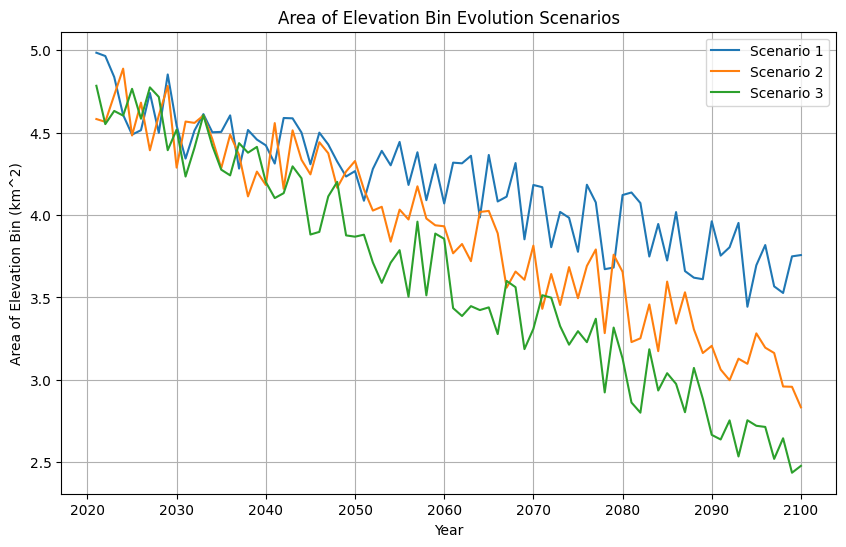

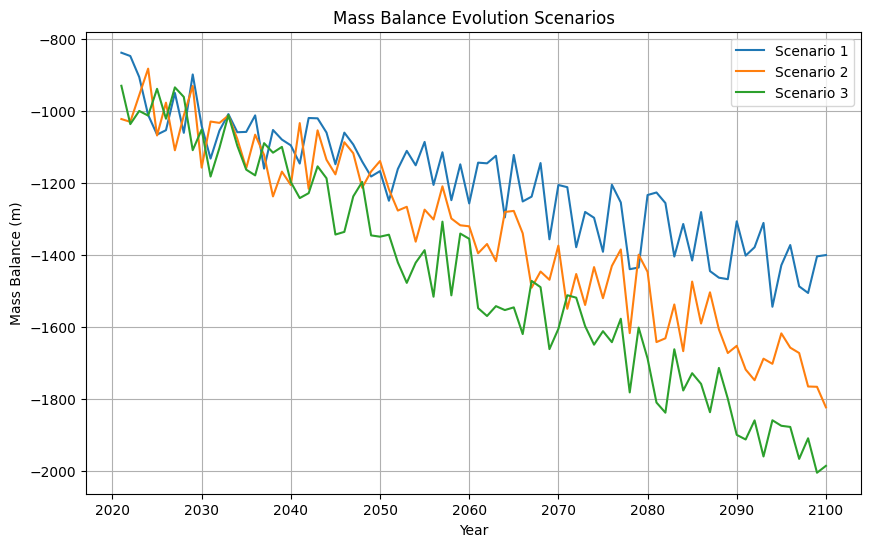

In [76]:
def predict_and_plot_for_all_scenarios(column_name, label, title):
    LR_model = LinearRegression()
    LR_X = data_GA['temperature_2m_mean (°C)'].values.reshape(-1, 1)
    LR_Y = data_GA[column_name].values

    LR_model.fit(LR_X, LR_Y)

    def predict_for_temperatures(temperatures):
        return LR_model.predict(np.array(temperatures).reshape(-1, 1))

    # Predict for the scenarios
    scenario_1_data = predict_for_temperatures(scenario_1_temperature)
    scenario_2_data = predict_for_temperatures(scenario_2_temperature)
    scenario_3_data = predict_for_temperatures(scenario_3_temperature)

    plt.figure(figsize=(10, 6))
    plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_1_data, label='Scenario 1')
    plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_2_data, label='Scenario 2')
    plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_3_data, label='Scenario 3')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.show()

predict_and_plot_for_all_scenarios('area of elevation bin_y', 'Area of Elevation Bin (km^2)',
                                   'Area of Elevation Bin Evolution Scenarios')
predict_and_plot_for_all_scenarios('annual mass balance_y', 'Mass Balance (m)', 'Mass Balance Evolution Scenarios')


## Neural Networks

C:\Users\victo\AppData\Local\Temp\ipykernel_12972\2850916409.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\victo\Desktop\MA1&2\2 - ERASMUS\Pt2. LAUSANNE\Lectures\Advanced Data Analysis\ADA_project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\victo\Desktop\MA1&2\2 - ERASMUS\Pt2. LAUSANNE\Lectures\Advanced Data Analysis\ADA_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\victo\Desktop\MA1&2\2 - ERASMUS\Pt2. LAUSANNE\Lecture

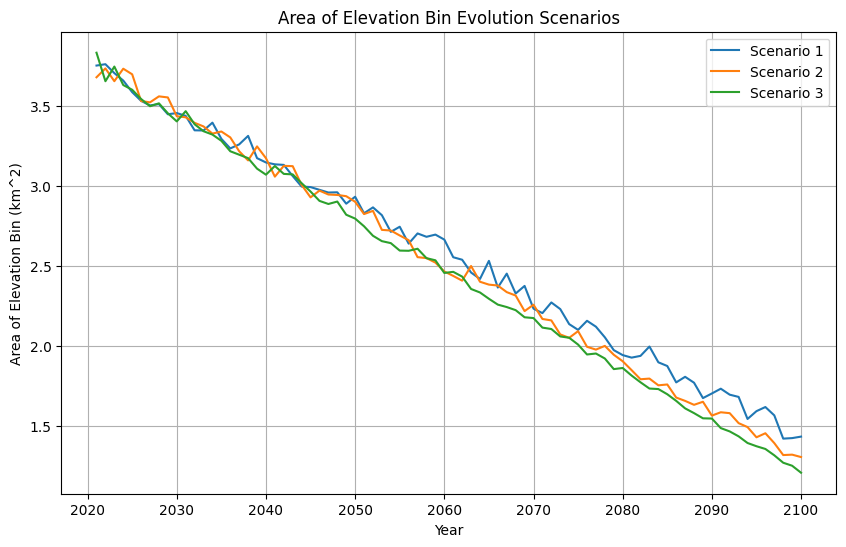

In [113]:
data_GA = pd.read_csv('data/data_GA.csv')
data_GA['ds'] = pd.to_datetime(data_GA['start date of observation'], format='%Y')

# Extract the relevant columns for regression
regression_data_GA = data_GA[['temperature_2m_mean (°C)', 'area of elevation bin_y', 'ds']]

# Convert ds to integer
regression_data_GA['ds'] = regression_data_GA['ds'].dt.year

# Scale & Standardise the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

NN_X = regression_data_GA[['temperature_2m_mean (°C)', 'ds']]
NN_Y = regression_data_GA['area of elevation bin_y']

NN_X_scaled = scaler_X.fit_transform(NN_X)
NN_Y_scaled = scaler_Y.fit_transform(NN_Y.values.reshape(-1, 1))

# Train the neural network model
NN_model = MLPRegressor(random_state=42)
NN_model.fit(NN_X_scaled, NN_Y_scaled)

# Create input arrays for predictions
scenario_1_input = scaler_X.transform(np.array(list(zip(scenario_1_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))
scenario_2_input = scaler_X.transform(np.array(list(zip(scenario_2_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))
scenario_3_input = scaler_X.transform(np.array(list(zip(scenario_3_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))

# Predict for the scenarios
scenario_1_predictions_scaled = NN_model.predict(scenario_1_input)
scenario_2_predictions_scaled = NN_model.predict(scenario_2_input)
scenario_3_predictions_scaled = NN_model.predict(scenario_3_input)

# Inverse transform the predictions to get actual values
scenario_1_predictions = scaler_Y.inverse_transform(scenario_1_predictions_scaled.reshape(-1, 1))
scenario_2_predictions = scaler_Y.inverse_transform(scenario_2_predictions_scaled.reshape(-1, 1))
scenario_3_predictions = scaler_Y.inverse_transform(scenario_3_predictions_scaled.reshape(-1, 1))

# Ensure predictions are positive
scenario_1_predictions = np.maximum(scenario_1_predictions, 0)
scenario_2_predictions = np.maximum(scenario_2_predictions, 0)
scenario_3_predictions = np.maximum(scenario_3_predictions, 0)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_1_predictions, label='Scenario 1')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_2_predictions, label='Scenario 2')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_3_predictions, label='Scenario 3')
plt.title('Area of Elevation Bin Evolution Scenarios')
plt.xlabel('Year')
plt.ylabel('Area of Elevation Bin (km^2)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_12972\454585383.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\victo\Desktop\MA1&2\2 - ERASMUS\Pt2. LAUSANNE\Lectures\Advanced Data Analysis\ADA_project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\victo\Desktop\MA1&2\2 - ERASMUS\Pt2. LAUSANNE\Lectures\Advanced Data Analysis\ADA_project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\vi

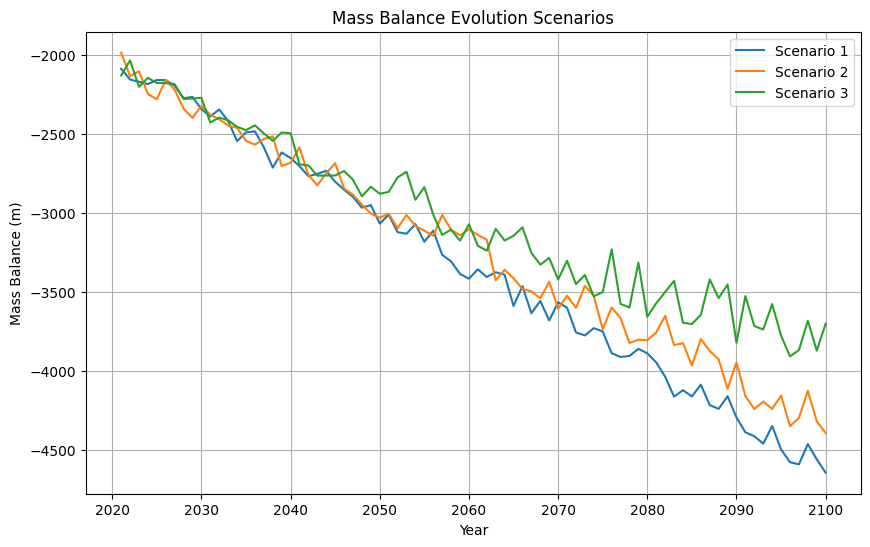

In [114]:
data_GA = pd.read_csv('data/data_GA.csv')
data_GA['ds'] = pd.to_datetime(data_GA['start date of observation'], format='%Y')

# Extract the relevant columns for regression
regression_data_GA = data_GA[['temperature_2m_mean (°C)', 'annual mass balance_y', 'ds']]

# Convert ds to integer
regression_data_GA['ds'] = regression_data_GA['ds'].dt.year

# Scale & Standardise the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

NN_X = regression_data_GA[['temperature_2m_mean (°C)', 'ds']]
NN_Y = regression_data_GA['annual mass balance_y']

NN_X_scaled = scaler_X.fit_transform(NN_X)
NN_Y_scaled = scaler_Y.fit_transform(NN_Y.values.reshape(-1, 1))

# Train the neural network model
NN_model = MLPRegressor(random_state=42)
NN_model.fit(NN_X_scaled, NN_Y_scaled)

# Create input arrays for predictions
scenario_1_input = scaler_X.transform(np.array(list(zip(scenario_1_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))
scenario_2_input = scaler_X.transform(np.array(list(zip(scenario_2_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))
scenario_3_input = scaler_X.transform(np.array(list(zip(scenario_3_temperature, range(CURRENT_YEAR, MAX_YEAR + 1)))))

# Predict for the scenarios
scenario_1_predictions_scaled = NN_model.predict(scenario_1_input)
scenario_2_predictions_scaled = NN_model.predict(scenario_2_input)
scenario_3_predictions_scaled = NN_model.predict(scenario_3_input)

# Inverse transform the predictions to get actual values
scenario_1_predictions = scaler_Y.inverse_transform(scenario_1_predictions_scaled.reshape(-1, 1))
scenario_2_predictions = scaler_Y.inverse_transform(scenario_2_predictions_scaled.reshape(-1, 1))
scenario_3_predictions = scaler_Y.inverse_transform(scenario_3_predictions_scaled.reshape(-1, 1))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_1_predictions, label='Scenario 1')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_2_predictions, label='Scenario 2')
plt.plot(range(CURRENT_YEAR, MAX_YEAR + 1), scenario_3_predictions, label='Scenario 3')
plt.title('Mass Balance Evolution Scenarios')
plt.xlabel('Year')
plt.ylabel('Mass Balance (m)')
plt.legend()
plt.grid(True)
plt.show()

## Prophet

In [66]:
data_GA = pd.read_csv('data/data_GA.csv')
data_GA['ds'] = pd.to_datetime(data_GA['start date of observation'], format='%Y')
data_GA['y'] = data_GA['area of elevation bin_y']

# Initialise and fit the Prophet model
# Here we use growth='flat' since we want to use the temperature as a regressor and give it more importance.
Prophet_model = Prophet(
    yearly_seasonality=1,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15,
    seasonality_prior_scale=10,
    interval_width=0.1,
    uncertainty_samples=10,
    mcmc_samples=0,
    growth='flat',
)

Prophet_model.add_regressor('temperature_2m_mean (°C)')

# Fit the model
Prophet_model.fit(data_GA)

scenario_1_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_1_temperature,
    })
)

scenario_2_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_2_temperature,
    })
)

scenario_3_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_3_temperature,
    })
)

fig = plotly.graph_objs.Figure()
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_1_temperature_prophet['ds'], y=scenario_1_temperature_prophet['yhat'], name='Scenario 1'))
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_2_temperature_prophet['ds'], y=scenario_2_temperature_prophet['yhat'], name='Scenario 2'))
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_3_temperature_prophet['ds'], y=scenario_3_temperature_prophet['yhat'], name='Scenario 3'))
fig.show()

10:14:33 - cmdstanpy - INFO - Chain [1] start processing
10:14:33 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
data_GA = pd.read_csv('data/data_GA.csv')
data_GA['ds'] = pd.to_datetime(data_GA['start date of observation'], format='%Y')
data_GA['y'] = data_GA['annual mass balance_y']

# Initialise and fit the Prophet model
# Here we use growth='flat' since we want to use the temperature as a regressor and give it more importance.
Prophet_model = Prophet(
    yearly_seasonality=1,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15,
    seasonality_prior_scale=10,
    interval_width=0.1,
    uncertainty_samples=10,
    mcmc_samples=0,
    growth='flat',
)

Prophet_model.add_regressor('temperature_2m_mean (°C)')

# Fit the model
Prophet_model.fit(data_GA)

scenario_1_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_1_temperature,
    })
)

scenario_2_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_2_temperature,
    })
)

scenario_3_temperature_prophet = Prophet_model.predict(
    pd.DataFrame({
        'ds': pd.date_range(start=data_GA['ds'].iloc[-1], periods=80, freq='YE'),
        'temperature_2m_mean (°C)': scenario_3_temperature,
    })
)

fig = plotly.graph_objs.Figure()
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_1_temperature_prophet['ds'], y=scenario_1_temperature_prophet['yhat'], name='Scenario 1'))
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_2_temperature_prophet['ds'], y=scenario_2_temperature_prophet['yhat'], name='Scenario 2'))
fig.add_trace(plotly.graph_objs.Scatter(x=scenario_3_temperature_prophet['ds'], y=scenario_3_temperature_prophet['yhat'], name='Scenario 3'))
fig.show()

10:03:44 - cmdstanpy - INFO - Chain [1] start processing
10:03:44 - cmdstanpy - INFO - Chain [1] done processing
